# Classification assignment | Statistics 3
Author: **616184**<br>
Student number: **616184**<br>
Date: **29-06-2020**

Before using this notebook, you need to install some packages. There're two options to install these, via pip install and via anaconda dashboard.
The following packages should be installed:

* numpy
* pandas
* scikit-learn
* xgboost
* matplotlib
* ipywidgets
* decision-tree-id3

From these we will need the following libraries:

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.naive_bayes import ComplementNB

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from id3 import Id3Estimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC


D:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# 1. The Data
We are going to use the datafile income_evalution from kaggle. This contains data about income from a selection of people from all over the world. We are going to use the following columns:age, workclass, education, maritual-status, relationship, race, native-country and income.

In [7]:
# Load income csv with the pd.read_csv
incomeCSV = pd.read_csv('data/income_evaluation.csv',',', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])

Here's a quick look at the data:

In [8]:
incomeCSV.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We are going to use some columns. We divide these columns in the x and y. In the x columns come all the indepent variables. In the y column i want the depent varaible. In this case, all of the the x variables are age, workclass, education, maritual-status, relationship, race, native-country. And the y variable is income. 

Some of the x varaibles are non numeric values. Therefore we need to categorize these, to create numeric categories.
We do this via pd.categorical(incomeCSV['name of value']). &
incomeCSV['name of value'].cat.codes

In [9]:
# code that returns the different categories in the y variable.
incomeCSV["workclass"] = pd.Categorical(incomeCSV["workclass"])
incomeCSV["education"] = pd.Categorical(incomeCSV["education"])
incomeCSV["marital-status"] = pd.Categorical(incomeCSV["marital-status"])
incomeCSV["relationship"] = pd.Categorical(incomeCSV["relationship"])
incomeCSV["race"] = pd.Categorical(incomeCSV["race"])
incomeCSV['native-country'] = pd.Categorical(incomeCSV['native-country'])
incomeCSV["income"] = pd.Categorical(incomeCSV["income"])

incomeCSV['workclass'] = incomeCSV["workclass"].cat.codes
incomeCSV['education'] = incomeCSV["education"].cat.codes
incomeCSV['marital-status'] = incomeCSV["marital-status"].cat.codes
incomeCSV['relationship'] = incomeCSV["relationship"].cat.codes
incomeCSV['race'] =  incomeCSV["race"].cat.codes
incomeCSV['native-country'] = incomeCSV['native-country'].cat.codes
incomeCSV['income'] = incomeCSV['income'].cat.codes

X = incomeCSV[["age","workclass","education","marital-status","relationship","race","native-country"]]
Y = incomeCSV["income"]

To train and test our model, we need to create train and test data.
We do this by splitting the data via train_test_split() function.

In [10]:
# code to split data in training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=109)

In [11]:
print("Original size: ", X.shape[0])
print("Predicted test set size (40%): ", 0.2*X.shape[0])
print("Actual test set size", X_test.shape[0])

Original size:  32561
Predicted test set size (40%):  6512.200000000001
Actual test set size 6513


# 2. The Basic Classification Models

To predict some values we're going to create some predictions on some dummy classifiers. This creates a baseline we were can reflect to.

We use multiple classifiers,
- most_frequent
- stratified
- prior
- uniform

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

print('Dummy classifier most frequent:')
dumMF = DummyClassifier(strategy='most_frequent')
dumMF = dumMF.fit(X_trainScaled, Y_train)
Y_pred = dumMF.predict(X_testScaled)
print('accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:',confusion_matrix(Y_test, Y_pred))

print('\nDummy classifier stratified:')
# Dummy classifier with stratified method
dumSrat = DummyClassifier(strategy="stratified")
dumSrat = dumSrat.fit(X_trainScaled, Y_train)
Y_pred = dumSrat.predict(X_testScaled)
print('accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:',confusion_matrix(Y_test, Y_pred))

print('\nDummy classifier prior:')
dumPrior = DummyClassifier(strategy="prior")
dumPrior.fit(X_trainScaled, Y_train)
Y_pred = dumPrior.predict(X_testScaled)
print('accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:',confusion_matrix(Y_test, Y_pred))

print('\nDummy classifier uniform:')
dumUni = DummyClassifier(strategy="uniform")
dumUni.fit(X_trainScaled, Y_train)
Y_pred = dumUni.predict(X_testScaled)
print('accuracy:',metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:',confusion_matrix(Y_test, Y_pred))

Dummy classifier most frequent:
accuracy: 0.7669276830953478
confusion matrix: [[4995    0]
 [1518    0]]

Dummy classifier stratified:
accuracy: 0.63841547673883
confusion matrix: [[3798 1197]
 [1158  360]]

Dummy classifier prior:
accuracy: 0.7669276830953478
confusion matrix: [[4995    0]
 [1518    0]]

Dummy classifier uniform:
accuracy: 0.4956241363426992
confusion matrix: [[2487 2508]
 [ 777  741]]


**\<explain all the results. What do the numbers mean?>**

So, those are our 'baseline'. A model should be dable to at least outperform these.

Lets dive in...

## 2.1. Naive Bayes

The first model discussed was the Naive Bayes model. 

Lets create and fit this model:

In [13]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Now to measure its performance:

In [14]:
# code to show its accuracy score AND confusion matrix.
Y_pred = gaussNB.predict(X_test)
print('accuracy score:', metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:', confusion_matrix(Y_test, Y_pred))

accuracy score: 0.7762935667127284
confusion matrix: [[4087  908]
 [ 549  969]]


This model allready outperforms the dummy classifier

Lets also have a look at what a prediction would be. We can test this with the x_test dataset. The outcome shows us how much percent was wrong during the prediction and how much was right. [[wrong percentage , right percentage ],

In [15]:
gaussNB.predict_proba(X_test)

array([[0.2699136 , 0.7300864 ],
       [0.95677576, 0.04322424],
       [0.42610518, 0.57389482],
       ...,
       [0.21278805, 0.78721195],
       [0.82428101, 0.17571899],
       [0.60099442, 0.39900558]])

That's about it for NB. A nice thing about NB is that it doesn't really require any parameters. Lets look at our next technique.

## 2.2. Support Vector Machines
The second model discussed were Support Vector Machines. There is a plural here, because we can use different kernels.

The basic kernel is the linear one, so we'll attempt that first:

In [16]:
SVMLIN = SVC(kernel='linear')
SVMLIN.fit(X_train, Y_train)
Y_pred = SVMLIN.predict(X_test)

print('accuracy score:',metrics.accuracy_score(Y_test, Y_pred))
print('matrix confusion:',confusion_matrix(Y_test, Y_pred))

accuracy score: 0.7669276830953478
matrix confusion: [[4995    0]
 [1518    0]]


**\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, and the NB?>**

We can use the same Support Vector Machines model but with a different kernel. We are using the rbf kernel, poly kernel and sigmoid kernel.

In [17]:
print('svc with rbf kernel')
SVMRBF = SVC(kernel='rbf')
SVMRBF.fit(X_train, Y_train)
Y_pred = SVMRBF.predict(X_test)
print('accuracy score:',metrics.accuracy_score(Y_test, Y_pred))
print('matrix confusion:',confusion_matrix(Y_test, Y_pred))

print('\nscv with poly kernel')
SVMPOLY = SVC(kernel='poly')
SVMPOLY.fit(X_train, Y_train)
Y_pred = SVMPOLY.predict(X_test)
print('accuracy score:',metrics.accuracy_score(Y_test, Y_pred))
print('matrix confusion:',confusion_matrix(Y_test, Y_pred))

print('\nscv with sigmoid kernel')
SVMSIGM = SVC(kernel='sigmoid')
SVMSIGM.fit(X_train, Y_train)
Y_pred = SVMSIGM.predict(X_test)
print('accuracy score:',metrics.accuracy_score(Y_test, Y_pred))
print('matrix confusion:',confusion_matrix(Y_test, Y_pred))

svc with rbf kernel
accuracy score: 0.7669276830953478
matrix confusion: [[4995    0]
 [1518    0]]

scv with poly kernel
accuracy score: 0.7669276830953478
matrix confusion: [[4995    0]
 [1518    0]]

scv with sigmoid kernel
accuracy score: 0.5641025641025641
matrix confusion: [[3567 1428]
 [1411  107]]


As you can see the top two kernels have excactly the same accuracy values (better than the dummy's). But the simoid kernel is a bit on the low side. 

Allright, lets move on to the third technique...

## 2.3. K-Nearest Neighbors
The third technique is the K-Nearest Neighbors (KNN). 

To use this we need to do some additional steps.

First we need to normalize our x variables. We do this via the standardScaler.
This model requires a value, the n_neighbors. We need to set this, therefore we use the value '2'. Later we calculate the value by the error rate.

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the train and test X values, using the same scaler (so based on the X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_trainScaled, Y_train)
Y_pred = knn.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:', confusion_matrix(Y_test, Y_pred))

accuracy score: 0.7970213419315215
confusion matrix: [[4668  327]
 [ 995  523]]


Second we need to determine how many neighbors (k) we want. To do this we'll visualize the results using different values for k.

Text(0, 0.5, 'Error Rate')

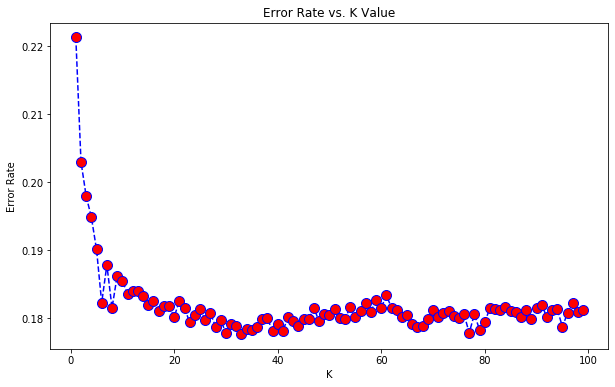

In [19]:
# Code to create the graph with Error Rate vs. K-values.
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled, Y_train)
    pred_i = knn.predict(X_testScaled)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

You can see that during this graph, the error rate decreases (which is good), but also increases (which is not to good). We need the lowest error rate, this is 79. With this error rate we get the highest accuracy.

Now that we know what we want k to be, we can create the model. With as n-neighbors as 79;

In [20]:
# code to create the model with the selected k
# Setup and fit the model (we use the same data as before)

knn = KNeighborsClassifier(n_neighbors=79)
knn.fit(X_trainScaled, Y_train)
Y_pred = knn.predict(X_testScaled)
print('accuracy score:', metrics.accuracy_score(Y_test, Y_pred))
print('confusion matrix:', confusion_matrix(Y_test, Y_pred))

accuracy score: 0.8217411331183786
confusion matrix: [[4583  412]
 [ 749  769]]


You can see that this accuracy is 82 percent. This is much higher than our dummy classifiers. The reason behind this is we choose the right amount of neighbours. This models is customized for our dataset.

One more basic technique to go.

## 2.4. Decision Trees
The decision trees are also a way to create a model.

**\<explain briefly in your own words how a Decision Tree method works>**

We are testing the following models:

* ID3 (or entropy with sklearn)
* Gini
* Random Forest
* Extra trees


In [21]:
# DecisionTreeClassifier package with entropy criterion

entropy = DecisionTreeClassifier(criterion = "entropy")
entropy.fit(X_trainScaled,Y_train)
Y_pred = entropy.predict(X_testScaled)
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.799324428066943
[[4442  553]
 [ 754  764]]


This is already one of the higher accuracy values. But not as high as k-nearest neighbour.

In [22]:
#Id3 package

id3 = Id3Estimator()
id3.fit(X_trainScaled, Y_train)
Y_pred = id3.predict(X_testScaled)
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.7924151696606786
[[4284  711]
 [ 641  877]]


A bit lower, but the values look quite the same as the descisiontreeclassifier with the entropy criterion

In [23]:
# DecisionTreeClassifier package with gini criterion

gini = DecisionTreeClassifier(criterion = "gini")
gini.fit(X_trainScaled,Y_train)
Y_pred = gini.predict(X_testScaled)
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.7961001074773529
[[4425  570]
 [ 758  760]]


This one is really close to the id3estimator, but not as high as the k-nearest neighbour.

**\<explain all the results. What do the numbers mean? How is this compared to the dummy classifiers, the NB, the SVM kernels, and the knn?>**

In [24]:
# RandomForestClassifier package

RandomForest = RandomForestClassifier(random_state=0)
RandomForestModel = RandomForest.fit(X_trainScaled, Y_train)
Y_pred = RandomForestModel.predict(X_testScaled)
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8134500230308613
[[4478  517]
 [ 698  820]]


The random forest has a really hight accuracy, but not as high as the k-nearest neighbour.

In [25]:
# Extremly Random Forest (a.k.a. Extra trees) package

ExtremeRandomForest = ExtraTreesClassifier(random_state=0)
ExtremeRandomForestModel = ExtremeRandomForest.fit(X_trainScaled, Y_train)
Y_pred = ExtremeRandomForestModel.predict(X_testScaled)
print(metrics.accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8122217104253032
[[4507  488]
 [ 735  783]]


This one even lower than the one we tried earlier, but has a good accuracy.

## 2.5. Other Models
Now we test some other models that also exists. 
We do this to get even an higher accuracy than the k-nearest neighbour with 82%.

* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Logistic Regression Classifier
* Multinomial Logistic Regression Classification
* Adaptive Boosting
* Gradient Boosting
* Histogram Gradient Boosting
* XGBoost
* Stacking


In [26]:
# code to create the models, fit the data, and show its accuracy score (the confusion matrix is here optional).
# make sure to print some text between to indicate which result belongs to which model.
print("\nLinear Discriminant Analysis")
LinearDiscriminant = LinearDiscriminantAnalysis()
LinearDiscriminantModel=LinearDiscriminant.fit(X_trainScaled, Y_train)
Y_pred = LinearDiscriminantModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nQuadratic Discriminant Analysis")
QuadraticDiscriminant = QuadraticDiscriminantAnalysis()
QuadraticDiscriminantModel=QuadraticDiscriminant.fit(X_trainScaled, Y_train)
Y_pred= QuadraticDiscriminantModel.predict(X_testScaled)

print("\nLogistic Regression Classification")
LogisticRegress = LogisticRegression()
LogisticRegressionModel = LogisticRegress.fit(X_trainScaled, Y_train)
Y_pred = LogisticRegressionModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nMultinomial Logistic Regression Classification")
LogisticRegressionML = LogisticRegression(multi_class='multinomial')
LogisticRegressionMLModel = LogisticRegressionML.fit(X_trainScaled, Y_train)
Y_pred = LogisticRegressionMLModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nAdaBoost")
adaBoost = AdaBoostClassifier(random_state=0)
adaBoostModel = adaBoost.fit(X_trainScaled, Y_train)
Y_pred = adaBoostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nGradient Boosting")
gradientBoost = GradientBoostingClassifier(random_state=0)
gradientBoostModel = gradientBoost.fit(X_trainScaled, Y_train)
Y_pred = gradientBoostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nXGBoost")
XGboost = HistGradientBoostingClassifier(random_state=0)
XGboostModel = XGboost.fit(X_trainScaled, Y_train)
Y_pred = XGboostModel.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))

print("\nStacking")


estimators = [
    ('rf', RandomForestClassifier(n_estimators=1, random_state=80)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=80)))]

stackCl = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stackCl.fit(X_trainScaled,Y_train)
Y_pred = stackCl.predict(X_testScaled)
print("Accuracy score: ",metrics.accuracy_score(Y_test, Y_pred))
print("Confusion matrix: ",confusion_matrix(Y_test, Y_pred))


Linear Discriminant Analysis
Accuracy score:  0.7557193305696299
Confusion matrix:  [[4827  168]
 [1423   95]]

Quadratic Discriminant Analysis

Logistic Regression Classification
Accuracy score:  0.7560264087210194
Confusion matrix:  [[4813  182]
 [1407  111]]

Multinomial Logistic Regression Classification
Accuracy score:  0.7560264087210194
Confusion matrix:  [[4813  182]
 [1407  111]]

AdaBoost
Accuracy score:  0.8281897742975587
Confusion matrix:  [[4563  432]
 [ 687  831]]

Gradient Boosting
Accuracy score:  0.8321817902656226
Confusion matrix:  [[4581  414]
 [ 679  839]]

XGBoost
Accuracy score:  0.8341777982496545
Confusion matrix:  [[4566  429]
 [ 651  867]]

Stacking


D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy score:  0.7945647167204053
Confusion matrix:  [[4570  425]
 [ 913  605]]


There are 3 models that outperform the k-nearest neighbour. This is Adaboost with <b>82.81%</b> accuracy, gradient boosting with  <b>83.21% </b> accuracy and XGboost with  <b>83,41% </b> accuracy